In [1]:
from datetime import datetime, timedelta

import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from util.stock_loader import Loader

In [2]:
DATA = '../models/qp/data'
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'ACN', 'ADBE', 'ADYEY', 'AMD', 'AMGN',
    'AMZN', 'ANET', 'ASML', 'AXON', 'BROS', 'BYND', 'CHWY', 'CRWD',
    'DDOG', 'DGX', 'DIS', 'DOCS', 'DOCU', 'DUOL', 'EDIT', 'ETSY',
    'FLGT', 'FTNT', 'GH', 'GMED', 'GOOG', 'IDXX', 'INTG', 'ISRG',
    'JD', 'KNSL', 'LRCX', 'LSPD', 'LULU', 'MA', 'MASI', 'MDB',
    'MELI', 'MNST', 'MSFT', 'MTCH', 'NET', 'NOW', 'NVCR', 'NVDA',
    'ODFL', 'OKTA', 'OPEN', 'PAC', 'PANW', 'PAYC', 'PINS', 'PTON',
    'PYPL', 'QDEL', 'RBLX', 'RDFN', 'RGEN', 'RIVN', 'RMD', 'ROKU',
    'RVLV', 'SAM', 'SBUX', 'SE', 'SHOP', 'SNOW', 'TASK', 'TDOC',
    'TEAM', 'TMUS', 'TREX', 'TSCO', 'TSLA', 'TTC', 'TTD', 'TTWO',
    'TWLO', 'TWTR', 'TYL', 'UPST', 'VEEV', 'VLD', 'VRTX', 'XPEV',
    'ZBRA', 'ZM']
LINGERERS = [
    'AGI', 'AMEH', 'APPS', 'APT', 'BRTX', 'BTTR', 'BYRN', 'CEF', 'CENN',
    'CGAU', 'COOP', 'CTGO', 'DQ', 'DTST', 'DYAI', 'EA',
    'EP', 'EPSN',  'ESOA', 'FCUV', 'FNV', 'FSI', 'GCBC', 'GME',
    'GNRC', 'GTLS', 'HBM', 'HMY', 'HNRG', 'IDR', 'INTZ', 'LPLA', 'MCVT',
    'MICS', 'MNMD', 'MOBQ', 'MTA', 'OMQS', 'PACB', 'PETV', 'POWW',
    'PRPH', 'RVP', 'RVYL', 'SAND', 'SOBR', 'STKL', 'UI', 'VIRT', 'WAVD',
    'WKHS', 'WRN', 'ZEST', 'ZYXI']
BEST_WEIGHTED = [
    'AORT', 'ATVI', 'BHC', 'CHS', 'CNXN', 'CRMT', 'CRUS', 'CUBI',
    'DORM', 'FKWL', 'LFMD', 'PARR', 'POWL', 'SIX', 'SRC', 'URBN',
    'USPH', 'VERU', 'VTSI', 'WGO']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)

In [3]:
N_YEARS = 10 # 5
N_DAYS = int(round(365.25 * N_YEARS))
END = (datetime.now() + timedelta(1)).date()
START = str(END - timedelta(N_DAYS))
START, END

('2013-02-04', datetime.date(2023, 2, 4))

In [4]:
batch = (
    sorted(list(set(SYMBOLS + LINGERERS + BEST_WEIGHTED))) + INDICES) # run all
stock_loader = Loader(batch, START, str(END), verbose=True)
data = stock_loader.download().rename(columns={'Adj Close': 'AdjClose'})

[*********************100%***********************]  167 of 167 completed
Generating derived columns...
AAPL... ABMD... ABNB... ACN... ADBE... ADYEY... AGI... AMD... AMEH... AMGN... AMZN... ANET... AORT... APPS... APT... ASML... ATVI... AXON... BHC... BROS... BRTX... BTTR... BYND... BYRN... CEF... CENN... CGAU... CHS... CHWY... CNXN... COOP... CRMT... CRUS... CRWD... CTGO... CUBI... DDOG... DGX... DIS... DOCS... DOCU... DORM... DQ... DTST... DUOL... DYAI... EA... EDIT... EP... EPSN... ESOA... ETSY... FCUV... FKWL... FLGT... FNV... FSI... FTNT... GCBC... GH... GME... GMED... GNRC... GOOG... GTLS... HBM... HMY... HNRG... IDR... IDXX... INTG... INTZ... ISRG... JD... KNSL... LFMD... LPLA... LRCX... LSPD... LULU... MA... MASI... MCVT... MDB... MELI... MICS... MNMD... MNST... MOBQ... MSFT... MTA... MTCH... NET... NOW... NVCR... NVDA... ODFL... OKTA... OMQS... OPEN... PAC... PACB... PANW... PARR... PAYC... PETV... PINS... POWL... POWW... PRPH... PTON... PYPL... QDEL... RBLX... RDFN... RGEN... 

In [5]:
data['Date'].tail()

2514   2023-01-30
2515   2023-01-31
2516   2023-02-01
2517   2023-02-02
2518   2023-02-03
Name: Date, dtype: datetime64[ns]

In [6]:
spx = data['DayToDayChange']['^GSPC']
spx = spx[1:]
#spx = spx / spx[1]
spx

1       1.010417
2       1.000549
3       0.998195
4       1.005658
5       0.999394
          ...   
2514    0.987031
2515    1.014642
2516    1.010452
2517    1.014699
2518    0.989645
Name: ^GSPC, Length: 2518, dtype: float64

In [7]:
data['DayToDayChange'].quantile(q=[0.75], axis=1).T[1:]

,0.75
1,1.012104
2,1.005931
3,1.008269
4,1.014062
5,1.004516
...,...
2514,0.992954
2515,1.034400
2516,1.042953
2517,1.049140


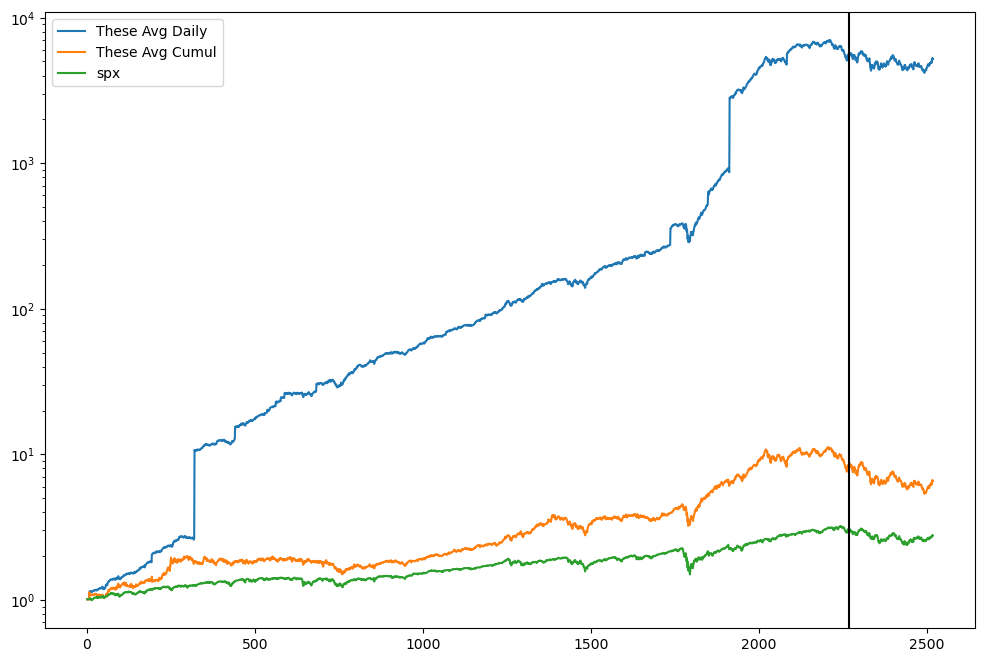

In [8]:
plt.figure(figsize=[12, 8])
plt.plot(
    data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
    label='These Avg Daily')
plt.plot(
    data['DayToDayChange'].cumprod().mean(axis=1),
    label='These Avg Cumul')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

In [9]:
out = pd.DataFrame(data.Date)
out['mine1'] = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
out['mine2'] = data['DayToDayChange'].cumprod().mean(axis=1)
out.head()

,Date,mine1,mine2
0,2013-02-04,NaN,NaN
1,2013-02-05,1.010266,1.010266
2,2013-02-06,1.013495,1.014706
3,2013-02-07,1.017481,1.014262
4,2013-02-08,1.017011,1.012361


In [10]:
out.tail()

,Date,mine1,mine2
2514,2023-01-30,4876.546801,6.158735
2515,2023-01-31,5006.638928,6.294666
2516,2023-02-01,5135.203054,6.485409
2517,2023-02-02,5285.285903,6.667241
2518,2023-02-03,5179.895424,6.577265


In [11]:
out.iloc[1:, :].to_csv('../data/mine.csv', index=False)

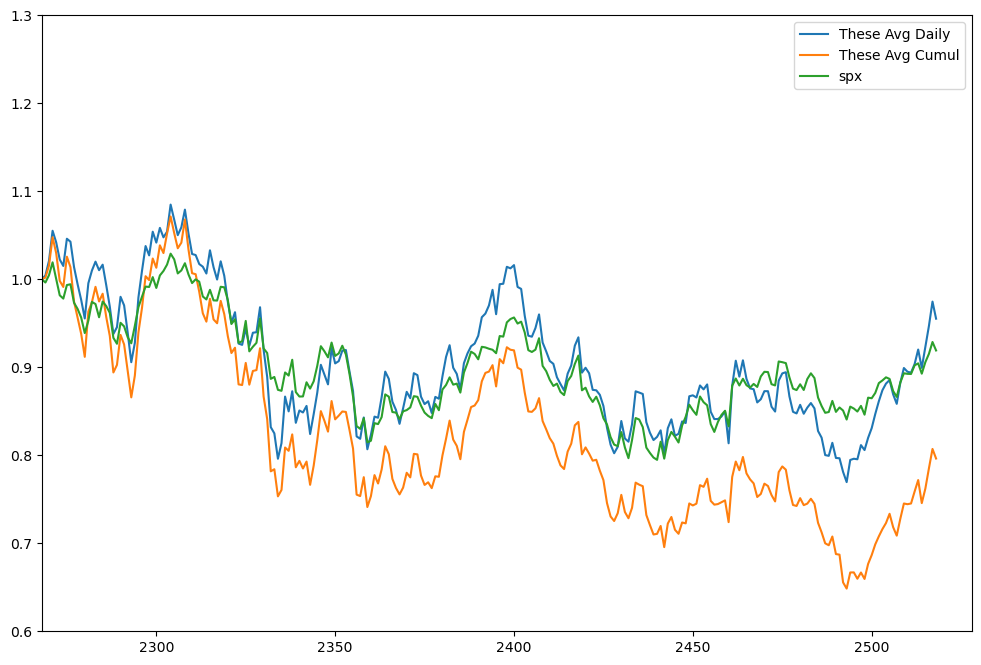

In [12]:
plt.figure(figsize=[12, 8])
a = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
n = len(a)
start = n - 250
a = a / a[start]
b = data['DayToDayChange'].cumprod().mean(axis=1)
b = b / b[start]
s = spx.cumprod()
s = s / s[start]
plt.plot(a, label='These Avg Daily')
plt.plot(b, label='These Avg Cumul')
plt.plot(s, label='spx')
#plt.yscale('log')
plt.xlim([one_year, n + 10])
plt.ylim(0.6, 1.3)
plt.legend();

In [13]:
def get_stock_data(stock, data, n_days=60):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (sub.Value[stock][sub.Value[stock].notna()].index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    if len(sub) > n_days:
        sub = sub.iloc[-n_days:, :]
    return sub

In [14]:
def get_hilo_mult(stock, ci=0.95):
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    sell_pt = stock.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt = stock.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt, sell_pt

In [15]:
#rblx = get_stock_data('SE', data)
#rblx.head()

In [16]:
#rblx = rblx[['Value', 'Close', 'High', 'Low']]
#rblx.head()

In [17]:
#rblx['NextHigh'] = rblx.High.shift(-1)
#rblx['NextLow'] = rblx.Low.shift(-1)
#rblx['HighMult'] = rblx.NextHigh / rblx.Close
#rblx['LowMult'] = rblx.NextLow / rblx.Close
#rblx.head()

In [18]:
# For selling:
#high_05 = rblx.HighMult.quantile(q=[0.05])
#print(high_05)
#plt.hist(rblx.HighMult)
#plt.axvline(x=high_05[0.05], color='red');

In [19]:
# For buying:
#low_95 = rblx.LowMult.quantile(q=[0.95])
#print(low_95.tolist()[0])
#plt.hist(rblx.LowMult)
#plt.axvline(x=low_95[0.95], color='red');

In [20]:
#get_hilo_mult(rblx), get_hilo_mult(rblx, ci=0.5)

In [21]:
#aapl = get_stock_data('AAPL', data)
#get_hilo_mult(aapl), get_hilo_mult(aapl, ci=0.5)

In [22]:
def get_macd(stock_data, fast=60, slow=90, signal=80):
    df = stock_data.copy()
    exp1 = df.Value.ewm(span=fast, adjust=False).mean()
    exp2 = df.Value.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    return is_rising

In [23]:
#rblx['Trend'] = get_macd(rblx)
#rblx.head()

In [24]:
np.linspace(0.5, 0.95, 5)

array([0.5   , 0.6125, 0.725 , 0.8375, 0.95  ])

In [25]:
CIS = [0.3, 0.4, 0.5, 0.61, 0.73, 0.84, 0.95]

In [26]:
def get_hilo_mults(stock, cis=CIS):
    stock['Trend'] = get_macd(stock)
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    upward = stock[stock.Trend == 1]
    downward = stock[stock.Trend == 0]
    buy_pts_up = upward.LowMult.quantile(q=cis).tolist()
    sell_pts_up = (
        upward.HighMult.quantile(q=[1 - ci for ci in cis]).tolist())
    buy_pts_down = downward.LowMult.quantile(q=cis).tolist()
    sell_pts_down = (
        downward.HighMult.quantile(q=[1 - ci for ci in cis]).tolist())
    return buy_pts_up + sell_pts_up + buy_pts_down + sell_pts_down

In [27]:
#get_hilo_mults(aapl)

In [28]:
columns = [
    f'{bs}_pt_{ud}_p{int(100*p)}' 
    for ud in ['up', 'down']
    for bs in ['buy', 'sell'] 
    for p in CIS]
#columns

In [29]:
out = []
for symbol in batch:
    stock = get_stock_data(symbol, data)
    mults = get_hilo_mults(stock)
    out.append([symbol, *mults])
df = pd.DataFrame(
    out, 
    columns=['stock'] + columns)
df.head()

,stock,buy_pt_up_p30,buy_pt_up_p40,buy_pt_up_p50,buy_pt_up_p61,buy_pt_up_p73,buy_pt_up_p84,buy_pt_up_p95,sell_pt_up_p30,sell_pt_up_p40,...,buy_pt_down_p73,buy_pt_down_p84,buy_pt_down_p95,sell_pt_down_p30,sell_pt_down_p40,sell_pt_down_p50,sell_pt_down_p61,sell_pt_down_p73,sell_pt_down_p84,sell_pt_down_p95
0,AAPL,0.982199,0.984759,0.988116,0.992559,0.994285,0.995132,1.001165,1.019034,1.016509,...,0.998082,1.000629,1.009406,1.020947,1.015400,1.008425,1.007400,1.004359,1.002006,0.993286
1,ABMD,0.998555,0.999118,0.999369,1.000000,1.000000,1.000053,1.000742,1.002162,1.001484,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,ABNB,0.975609,0.977731,0.987913,0.990302,0.995094,1.002710,1.013039,1.039292,1.024436,...,0.989945,1.000269,1.005215,1.020570,1.018577,1.013305,1.008634,1.002575,0.999208,0.987878
3,ACN,0.978965,0.982878,0.985721,0.989809,0.996726,1.000532,1.004233,1.013957,1.010152,...,0.998998,1.000703,1.009515,1.024470,1.017735,1.015504,1.008379,1.001654,0.995667,0.989098
4,ADBE,0.974174,0.980106,0.983787,0.990005,0.993488,0.999386,1.006571,1.020801,1.017824,...,0.999844,1.005459,1.025504,1.028681,1.024742,1.017744,1.013419,1.006872,1.001044,0.997312


In [30]:
last = data.index.max()
price = pd.DataFrame(data.loc[last, 'Value'])
price.columns = ['price']
price['stock'] = price.index
price

,price,stock
AAPL,154.5,AAPL
ABMD,NaN,ABMD
ABNB,118.699997,ABNB
ACN,289.220001,ACN
ADBE,379.329987,ADBE
...,...,...
ZM,79.540001,ZM
ZYXI,13.64,ZYXI
^GSPC,4136.47998,^GSPC
^IXIC,12006.955078,^IXIC


In [31]:
prices = df.merge(price, how='left', on='stock')
prices.head()

,stock,buy_pt_up_p30,buy_pt_up_p40,buy_pt_up_p50,buy_pt_up_p61,buy_pt_up_p73,buy_pt_up_p84,buy_pt_up_p95,sell_pt_up_p30,sell_pt_up_p40,...,buy_pt_down_p84,buy_pt_down_p95,sell_pt_down_p30,sell_pt_down_p40,sell_pt_down_p50,sell_pt_down_p61,sell_pt_down_p73,sell_pt_down_p84,sell_pt_down_p95,price
0,AAPL,0.982199,0.984759,0.988116,0.992559,0.994285,0.995132,1.001165,1.019034,1.016509,...,1.000629,1.009406,1.020947,1.015400,1.008425,1.007400,1.004359,1.002006,0.993286,154.5
1,ABMD,0.998555,0.999118,0.999369,1.000000,1.000000,1.000053,1.000742,1.002162,1.001484,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
2,ABNB,0.975609,0.977731,0.987913,0.990302,0.995094,1.002710,1.013039,1.039292,1.024436,...,1.000269,1.005215,1.020570,1.018577,1.013305,1.008634,1.002575,0.999208,0.987878,118.699997
3,ACN,0.978965,0.982878,0.985721,0.989809,0.996726,1.000532,1.004233,1.013957,1.010152,...,1.000703,1.009515,1.024470,1.017735,1.015504,1.008379,1.001654,0.995667,0.989098,289.220001
4,ADBE,0.974174,0.980106,0.983787,0.990005,0.993488,0.999386,1.006571,1.020801,1.017824,...,1.005459,1.025504,1.028681,1.024742,1.017744,1.013419,1.006872,1.001044,0.997312,379.329987


In [32]:
def round_if_float(x):
    if np.isnan(x):
        return -1
    return round(x, 2)

In [33]:
for col in list(prices):
    if col.startswith('buy') or col.startswith('sell'):
        prices[col] *= prices.price
    if col != 'stock':
        prices[col] = prices[col].apply(round_if_float)
prices.set_index('stock', inplace=True)
prices.drop(INDICES, inplace=True)
prices.tail()

,buy_pt_up_p30,buy_pt_up_p40,buy_pt_up_p50,buy_pt_up_p61,buy_pt_up_p73,buy_pt_up_p84,buy_pt_up_p95,sell_pt_up_p30,sell_pt_up_p40,sell_pt_up_p50,...,buy_pt_down_p84,buy_pt_down_p95,sell_pt_down_p30,sell_pt_down_p40,sell_pt_down_p50,sell_pt_down_p61,sell_pt_down_p73,sell_pt_down_p84,sell_pt_down_p95,price
stock,,,,,,,,,,,,,,,,,,,,,
XPEV,9.70,9.87,10.00,10.14,10.29,10.45,10.64,11.35,11.08,10.79,...,10.72,10.95,11.31,11.19,10.96,10.75,10.67,10.36,10.14,10.50
ZBRA,321.99,323.94,325.39,327.97,329.78,331.28,334.98,339.66,337.83,335.78,...,330.37,335.02,339.88,338.80,335.85,334.31,331.75,329.25,326.53,330.81
ZEST,0.29,0.29,0.30,0.30,0.30,0.31,0.32,0.36,0.36,0.35,...,0.32,0.32,0.36,0.35,0.34,0.34,0.33,0.32,0.32,0.32
ZM,77.09,77.46,77.65,78.12,78.45,79.07,80.79,82.61,81.24,80.69,...,78.91,80.16,81.25,81.01,80.65,80.26,79.71,79.10,78.31,79.54
ZYXI,13.26,13.34,13.41,13.47,13.50,13.58,13.62,13.99,13.94,13.92,...,13.64,13.71,14.16,14.12,14.09,14.06,13.92,13.79,13.75,13.64


In [34]:
prices.to_csv('mults.csv')
!open ./mults.csv